# Práctica: Fundamentos de Data Science

Para la práctica de la asignatura de Fundamentos de Data Science, se va a analizar un conjunto de libros.
La práctica se divide en 2 partes principales:
* [**Análisis Exploratorio**](#analisis-exploratorio) En este punto se realiza el análisis estático del dataset obtenido, tratando los valores nulos y buscando las variables de interés, así como haciendo un breve contraste de hipótesis.
* [**Machine Learning con BigML**](./books-bigml.ipynb) En este punto se emplea la herramienta online [BigML](https://bigml.com/) para realizar un entrenamiento supervisado y un entrenamiento no supervisado sobre el que obtener conclusiones.


# Análisis Exploratorio <a class="anchor" name="analisis-exploratorio"/>

## Tabla de contenidos:
* [Descarga de datos](#descarga-datos)
* [Carga inicial de los datos](#carga-inicial)
* [Observación de valores nulos](#datos-nulos)
    * [Identificadores](#columnas-identificadores)
    * [Libros](#columnas-informacion)
    * [Usuarios](#columnas-usuarios)
    * [Autores](#columnas-autores)
* [Distribución y Correlaciones](#distribucion-correlacion)
    * [Fechas de publicación](#fechas-de-publicacion)
    * [Géneros](#generos)
    * [Número de páginas](#numero-de-paginas)
    * [Formatos](#formatos)
    * [Libros mejor valorados](#libros-mejor-valorados)
    * [Preparación para el gráfico de burbujas](#bubble-genres)

## Descarga de datos <a class="anchor" name="descarga-datos"/>
Para la descarga de datos, se ha optado por el uso de un API.
En concreto se va a utilizar el API de goodreads, una página especializada en libros, con más de 85 millones de usuarios y más de 2.5 billones (americanos) de libros. ([https://www.goodreads.com/about/us](https://www.goodreads.com/about/us)).

El API ([https://www.goodreads.com/api](https://www.goodreads.com/api)) disponde un endpoint REST en el que se puede obtener la información detallada de un libro por _ISBN_ o por un _ID_ propio de su sistema. 
Para el caso de esta práctica se ha hecho un script en python (<a href="goodreads.py">*goodreads.py*</a>) que permite descargar la lista completa de libros en un fichero csv. 

Para facilitar el uso del notebook, se proporciorna un fichero csv con los libros descargados previamente: _books.csv_ 

Para usar el script bastaría con lanzar el comando: `python3 goodreads.py` 

Este script acepta parametros de entrada, como desde que libro hasta que libro se quiere ir, y cuantos libros se quieren saltar entre cada libro. `python3 goodreads.py -o FILENAME -s START_BOOK -e END_BOOK -l SKIP_BOOKS` 

Debido a la inmensa cantidad de libros se ha precalculado un listado de libros para no tener que hacer uso del script en la evaluación. Se ha generado un fichero _books_expanded.csv_ con unos XXXXXX libros, aunque supongan un porcentaje pequeño del total de libros disponibles en la plataforma http://www.goodreads.com

## Carga inicial de los datos <a class="anchor" name="carga-inicial"/>

Se carga en memoria mediante pandas el dataset de libros almancenado en un repositorio _gitHub_. 

Adicionalmente se obtiene la primera información sobre los datos que contine el dataset. 

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/pedroortizgm/books-data-science/master/books_complete.csv",
    low_memory=False
)

df.shape

(140809, 42)

In [2]:
df.head()

,id,isbn,title,isbn13,asin,kindle_asin,marketplace_id,country_code,publication_date,publisher,...,authors,illustrator,contributor,editor,translator,narrator,to_read,read,currently_reading,genres
0,1,0439785960,Harry Potter and the Half-Blood Prince (Harry ...,9780439785969,NaN,NaN,NaN,ES,2006/9/16,Scholastic Inc.,...,J.K. Rowling,Mary GrandPré,NaN,NaN,NaN,NaN,230741.0,7503,22404.0,"adventure,childrens,classics,contemporary,fant..."
1,501,1425318738,The Tesla Rotating Magnetic Field,9781425318734,NaN,NaN,NaN,ES,NaN,NaN,...,"Nikola Tesla,Thomas Commerford Martin",NaN,NaN,NaN,NaN,NaN,15.0,0,2.0,NaN
2,1001,0740755706,Millionaire Women Next Door: The Many Journeys...,9780740755705,NaN,NaN,NaN,ES,2005/8/1,Andrews McMeel Publishing,...,Thomas J. Stanley,NaN,NaN,NaN,NaN,NaN,972.0,12,129.0,"adult,business,economics,feminism,non-fiction,..."
3,1501,0865165130,The Essential Euripides,9780865165137,NaN,NaN,NaN,ES,1995/1/1,Bolchazy-Carducci Publishers,...,"Euripides,Robert Emmet Meagher",NaN,NaN,NaN,NaN,NaN,4.0,0,NaN,"adult,adult-fiction"
4,2001,1584153253,J.K. Rowling,9781584153252,NaN,NaN,NaN,ES,2005/2/1,Mitchell Lane Publishers,...,Ann Gaines,NaN,NaN,NaN,NaN,NaN,173.0,2,1.0,"biography,biography-memoir,non-fiction"


## Observación de valores nulos <a class="anchor" name="datos-nulos"/>
El siguiente paso es observar los datos, los valores que toman y si hay valores nulos. 

Para cada una de las columnas del dataset se identifica si tienen valores nulos y cuántos hay en cada uno y la acción a tomar en cada caso.


Con los tipos y la muestra, se puede deducir la información de cada columna:

| Columna | Tipo | Observaciones | Tipo de Campo |
| --- | --- | --- | --- |
| id | int64 | ID en GoodReads | Identificador |
| isbn | object |  ISBN | Identificador |
| title | object |  Titulo | Información |
| isbn13 | float64 | Codigo ISBN de 13 digitos |  Identificador |
| asin | object | Identificador del libro en Amazon |  Identificador |
| kindle_asin | float64 | Codigo Kindle |  Identificador |
| marketplace_id | float64 | Código del mercado |  Identificador |
| country_code | object |  Código de País | Información |
| publication_date | object |  Fecha de publicación | Información | 
| publisher | object | Publicador/Editorial | Información |
| language_code | object | Código de idioma de la publicación | Información |
| is_ebook | bool | Es un E-Book | Información |
| books_count | int64 | ? | Usuarios |
| best_book_id | int64 | ? | Usuarios |
| reviews_count | int64 | Número de opiniones | Usuarios |
| ratings_sum | int64 | Sumatorio de las puntuaciones | Usuarios |
| ratings_count | int64 | Número de puntuaciones | Usuarios |
| text_reviews_count | int64 | Número de opiniones escritas | Usuarios |
| original_publication_date | object | Fecha de publicación original | Informacion |
| original_title | object| Titulo original | Informacion |
| media_type | object | Tipo de medio | Información |
| num_ratings_5 | int64 | Número de veces que han puntuado con un 5 | Usuarios |
| num_ratings_4 | int64 | Número de veces que han puntuado con un 4 | Usuarios |
| num_ratings_3 | int64 | Número de veces que han puntuado con un 3 | Usuarios |
| num_ratings_2 | int64 | Número de veces que han puntuado con un 2 | Usuarios |
| num_ratings_1 | int64 | Número de veces que han puntuado con un 1 | Usuarios |
| average_rating | float64 | Valoración media | Usuarios |
| num_pages | float64 | Número de páginas | Información |
| format | object | Formato | Información |
| edition_information | object  | Informacíón sobre la edición | Información |
| ratings_count_global | int64  | Número de valoraciones total | Usuarios |
| text_reviews_count_global | int64 | Número de reseñas total | Usuarios |
| authors | object | Autor | Autores |
| illustrator | object | Ilustrador | Autores | 
| contributor | object | Constribuidor | Autores |
| editor | object | Editor | Autores |
| translator | object | Traductor | Autores |
| narrator | object | Narrador | Autores |
| to_read | float64 | Número de personas que lo quieren leer | Usuarios |
| read | int64 | Número de personas que lo han leído | Usuarios |
| currently_reading | float64 | Número de personas que lo están leyendo | Usuarios |
| genres | object | Lista de géneros | Información |

Adicionalmente se ha identificado a qué hace referencia cada columna:
* Identificador : Identificadores del libro
* Información: Información sobre el libro o la edición
* Usuarios: Información sobre las valoraciones de los usuarios, reseñas, etc.
* Autores: Información sobre los creadores del libro

Se observa cuántos valores nulos contiene cada columna.

In [3]:
df.isna().sum()

id                                0
isbn                          26534
title                             0
isbn13                        23135
asin                         124630
kindle_asin                  140809
marketplace_id               140809
country_code                      0
publication_date              41018
publisher                     41553
language_code                109810
is_ebook                          0
books_count                       0
best_book_id                      0
reviews_count                     0
ratings_sum                       0
ratings_count                     0
text_reviews_count                0
original_publication_date     34500
original_title                59504
media_type                    75956
num_ratings_5                     0
num_ratings_4                     0
num_ratings_3                     0
num_ratings_2                     0
num_ratings_1                     0
average_rating                    0
num_pages                   

### Información sobre los identificadores <a class="anchor" name="columnas-identificadores"/>

Se eliminarán todos los registros que no contengan **isbn** o **isbn13**. Dado que se trata de los identificadores del libro, ayudará a eliminar aquellos de los que no se disponen todos los datos.

In [4]:
df.drop(columns = ["isbn", "isbn13"], inplace=True)

Las columnas **asin**, **kindel_asin** y **marketplace_id** apenas tienen valores, por lo que no parece que vayan a ser estadísticamente relevantes. Se eliminan del dataset:

In [5]:
df.drop(columns = ['asin', 'kindle_asin', 'marketplace_id'], inplace=True)

### Información sobre el libro <a class="anchor" name="columnas-informacion"/>

Se observa que todos los libros tienen título (**title**) y prácticamente todos tienen **original_title**. Se suprimen los libros que no tienen alguno de esos dos campos debido al gran volumen de información que tenemos y así poder mezclar mejor los datos.

In [6]:
df.dropna(subset=["title", "original_title"], inplace=True)

Además se eliminan libros duplicados , esto es que compartan el campo **original_title**.

In [7]:
df.drop_duplicates(subset=["original_title"], inplace=True)

Las columna **country_code** no contiene nulos pero se ve que todos los valores son iguales por lo que podría ser eliminada.

In [8]:
df.country_code.unique()

array(['ES'], dtype=object)

In [9]:
df.drop(columns = ['country_code'], inplace=True)

Existen dos columnas relacionadas con las fechas de publicación, **publication_date** y **original_publication_date**. Para comprobar cuál es más interesante para el estudio, se analizan los nulos en cada una de ellas.

Debido a que hay pocos libros con fecha original de publicación nula (*original_publication_date*) y se considera que es un campo importante sobre el que hacer muestreo y obtener información, se toma la decisión de borrarlos.

In [10]:
print("publication_date", df.publication_date.isna().sum())
print("original_publication_date", df.original_publication_date.isna().sum())
df.dropna(subset=["original_publication_date"], inplace=True)
print("publication_date", df.publication_date.isna().sum())
print("original_publication_date", df.original_publication_date.isna().sum())

publication_date 18825
original_publication_date 3565
publication_date 16041
original_publication_date 0


Tanto la columna **publisher** como **language_code** contienen nulos y deben ser tratados como *unkown* en lugar de como nulos, dado que es una información que no ha sido proporcionada.

In [11]:
df.publisher.fillna(value="unknown", inplace=True)
df.language_code.fillna(value="unknown", inplace=True)

La columna **is_ebook** no contine nulos y tiene un valor boolean en el que indica si un libro está en formato electrónico o no.

In [12]:
df.is_ebook.unique()

array([False,  True])

Parece que la columna **media_type** tiene nulos, se obtienen los valores únicos:

In [13]:
df["media_type"].unique()

array(['book', nan, 'article', 'not a book', 'periodical'], dtype=object)

Se reemplazan los libros con **media_type** *NaN* por *unknown*:

In [14]:
df.media_type.fillna(value='unknown', inplace=True)
df.media_type.unique()

array(['book', 'unknown', 'article', 'not a book', 'periodical'],
      dtype=object)

Se eliminan los libros que, o bien no tienen **número de páginas**, o su valor es menor o igual que cero.

In [15]:
import numpy as np
df.loc[(df.num_pages < 0) | (df.num_pages == 0), "num_pages"] = np.nan
df.dropna(subset=["num_pages"], inplace=True)
df.num_pages.isna().sum()

0

Se analiza la columna **format** y se observan valores nulos.

In [16]:
df.format.unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Leather Bound',
       'Audiobook', nan, 'Unknown Binding', 'Audio CD', 'paper',
       'Board book', 'paperback', 'Trade Paperback', 'ebook',
       'Textbook Binding', 'Board Book', 'Library Binding',
       'Spiral-bound', 'Stripboek', 'Mass Market', 'Foam Book',
       'Paperback ', 'chapbook', 'Hard Cover', 'paper back', 'Pamphlet',
       'Comic', 'Audio Cassette', 'cloth', 'Comic Book', 'hard cover',
       'Softcover', 'Soft Cover', 'hardcover', 'Loose-Leaf',
       'Springs of Wisdom', 'Spiral Bound', 'Leather Bound Hardcover',
       'Audio', 'hardback', 'Perfect Paperback', 'Vinyl Bound',
       'Kindle Edition', 'Unknown', 'hand-sewn chapbook', 'Brochura',
       'Broché', 'Digital audio player',
       '12,7x18,5 rústica con cuadernillos cosidos al hilo', 'Capa Mole',
       'kindle', 'MP3 CD', 'CD-ROM', 'Unbound', 'DVD Audio',
       'Preloaded Digital Audio Player', 'print', 'Pocket', 'Brossura',
       'Flexible

Para evitar el borrado de muchos libros de forma innecesaria, a todos los libros que no tengan un formato especificado se les asigna el formato *unknown*.

In [17]:
df.format = df.format.fillna(value="unknown")

Del mismo modo que la columna anterior, se analiza la columna **edition_information** y se tratan los valores nulos. 

In [18]:
df.edition_information.head()

0    NaN
3    NaN
4    NaN
5    NaN
6    NaN
Name: edition_information, dtype: object

Para evitar el borrado de muchos libros de forma inncesaria se asigna el formato *unknown*.

In [19]:
df.edition_information = df.edition_information.fillna(value="unknown")
df.edition_information.value_counts().head()

unknown           45514
Large Print         196
Second Edition      157
First Edition        81
Third Edition        66
Name: edition_information, dtype: int64

Se puede observar que en la mayoría de los casos no se ha propocionado información por lo que esta información puede terminar no siendo de utilidad. 

Sobre el campo **genres** se puede ver que es un campo con multivalores, por lo que el tratamiento que se hará en convertir el campo de generos a columnas, para ello se utiliza la función *get_dummies()* que genera tantas columnas como géneros haya.

Por otra parte, también se observa que la columna cuenta con nulos:

In [20]:
df.genres.isna().sum()

12028

En este caso, para el estudio sobre los géneros, interesa sustituir los valores nulos por el literal *unknown*. Se llevará a cabo haciendo una copia del dataframe, únicamente de la columna de interés, y así mantener el original intacto:

In [21]:
df_genres = df[["genres"]].copy()
df_genres.fillna(value="unknown", inplace=True)
print("Nulos en la columna genres: {}".format(df_genres.genres.isna().sum()))
df_genres.head(3)

Nulos en la columna genres: 0


,genres
0,"adventure,childrens,classics,contemporary,fant..."
3,"adult,adult-fiction"
4,"biography,biography-memoir,non-fiction"


Sobre el dataframe de estudio, se utiliza la función *get_dummies* que extraerá todos los géneros a columnas y se eliminará la columna original *genres*.

Al ser una operación pesada, se vuelca el resultado en un csv y en posteriores ejecuciones se leerá del fichero en lugar de volver a generar los dummies.

In [22]:
# Código para generar los dummies

# df_genres = df_genres.join(df_genres.genres.str.get_dummies(sep=","))
# df_genres.drop(columns=["genres"], inplace=True)
# df_genres.to_csv("genres.csv", index=False)

In [23]:
df_genres = pd.read_csv("https://raw.githubusercontent.com/pedroortizgm/books-data-science/master/genres.csv")
df = df.join(df_genres)
df.columns

Index(['id', 'title', 'publication_date', 'publisher', 'language_code',
       'is_ebook', 'books_count', 'best_book_id', 'reviews_count',
       'ratings_sum',
       ...
       'unknown', 'urban-fantasy', 'vampires', 'victorian', 'war',
       'werewolves', 'witches', 'writing', 'young-adult', 'zombies'],
      dtype='object', length=215)

### Información sobre los usuarios <a class="anchor" name="columnas-usuarios"/>

Las columnas **books_count** y **best_book_id** no tienen un valor relevante para este estudio por lo que se eliminan del set de datos.

In [24]:
df.drop(columns=["books_count", "best_book_id"], inplace=True)

Como se ha observado anteriormente, se comprueba si existen nulos en las columnas referidas a las valoraciones de los usuarios:

In [25]:
print("reviews_count: {}".format(df.reviews_count.isna().sum()))
print("ratings_sum: {}".format(df.ratings_sum.isna().sum()))
print("ratings_count: {}".format(df.ratings_count.isna().sum()))
print("text_reviews_count: {}".format(df.text_reviews_count.isna().sum()))
print("text_reviews_count_global: {}".format(df.text_reviews_count_global.isna().sum()))
print("num_ratings_5: {}".format(df.num_ratings_5.isna().sum()))
print("num_ratings_4: {}".format(df.num_ratings_4.isna().sum()))
print("num_ratings_3: {}".format(df.num_ratings_3.isna().sum()))
print("num_ratings_2: {}".format(df.num_ratings_2.isna().sum()))
print("num_ratings_1: {}".format(df.num_ratings_1.isna().sum()))
print("average_rating: {}".format(df.average_rating.isna().sum()))
print("rating_count_global: {}".format(df.ratings_count_global.isna().sum()))

reviews_count: 0
ratings_sum: 0
ratings_count: 0
text_reviews_count: 0
text_reviews_count_global: 0
num_ratings_5: 0
num_ratings_4: 0
num_ratings_3: 0
num_ratings_2: 0
num_ratings_1: 0
average_rating: 0
rating_count_global: 0


Se analiza la columna **average_rating**. En caso de no tener valores, se deberían filtrar los registros que correspondan en una vista para hacer calculos. Por ejemplo, calcular los libros que tengan valoración por encima de la media.

A priori, no se observan libros sin valoración media.

In [26]:
df.average_rating.fillna(value="unknown", inplace=True)
df.average_rating.value_counts().head()

0.0    5077
4.0    2969
3.0    1533
5.0    1282
3.5     883
Name: average_rating, dtype: int64

A continuación se trata el campo **ratings_count_global**. Representa el total de valoraciones que ha recibido el libro.
En caso de tener algun valor nulo, se reemplaza por cero.

In [27]:
df.ratings_count_global.fillna(value=0, inplace=True)

Además, el tipo de datos es el correcto para un contador

In [28]:
df.ratings_count_global.dtype

dtype('int64')

Las columnas **to_read**, **read**, **currently_reading** se interprentan como un contador con la gente que ha leído, está leyendo o va leer el libro, por lo que se establece que los valores nulos se sustituyen por 0.

In [29]:
df.to_read.fillna(value=0, inplace=True)
df.read.fillna(value=0, inplace=True)
df.currently_reading.fillna(value=0, inplace=True)

Comprobamos que ya no tenemos valores nulos en esas columnas:

In [30]:
print("to_read: {}".format(df.to_read.isna().sum()))
print("read: {}".format(df.read.isna().sum()))
print("currently_reading: {}".format(df.currently_reading.isna().sum()))

to_read: 0
read: 0
currently_reading: 0


Una vez que tenemos todos los valores libres de nulos, podemos asignarle el tipo de dato que consideramos más correcto. En éste caso, dado que representa un número de personas, se expresan los resultados como números enteros

In [31]:
df.to_read = df.to_read.astype('int64', copy=True)
df.read = df.read.astype('int64', copy=True)
df.currently_reading = df.currently_reading.astype('int64', copy=True)

In [32]:
df[["to_read", "read", "currently_reading"]].head()

,to_read,read,currently_reading
0,230741,7503,22404
3,4,0,0
4,173,2,1
5,195745,971,10698
6,116,5,2


### Información sobre los autores <a class="anchor" name="columnas-autores"/>

A continuación se tratan las columnas que tiene información sobre los autores, ilustradores, etc.

In [33]:
print("authors: {}".format(df.authors.isna().sum()))
print("illustrator: {}".format(df.illustrator.isna().sum()))
print("contributor: {}".format(df.contributor.isna().sum()))
print("editor: {}".format(df.editor.isna().sum()))
print("translator: {}".format(df.translator.isna().sum()))
print("narrator: {}".format(df.narrator.isna().sum()))


authors: 3298
illustrator: 46023
contributor: 47576
editor: 43773
translator: 46017
narrator: 48080


Para este caso, únicamente se van a tratar a los autores, puesto que el resto de campos tienen muchos valores nulos y no aportan mucho valor al análisis que se va a realizar.
Los autores nulos se tratarán como libros anonimos.

In [34]:
df.authors.fillna(value="anonymous", inplace=True)
df.authors.isna().sum()

0

Para poder hacer operaciones con los autores, habría que realizar el mismo tratamiento que se ha hecho con los géneros. Al ser una operación muy pesada y no tener mucho valor para el análisis que se va a realizar a continuación, se prescinde de esta operación pero se deja en un notebook adicional (<a href="create_authors.ipynb">create_authors.ipynb</a>) que habría que hacer para llevar a cabo esta operación.

In [35]:
# Código para tratar la variable *autores* multivaluada

#df.join(df.genres.str.get_dummies(sep=","))
#df_authors = pd.read_csv("autores.csv")
#df = df.join(df_authors)
#df.columns

In [36]:
df.shape

(48193, 213)

## Distribución y Correlaciones <a class="anchor" name="distribucion-correlacion"/>

Tras la limpieza de datos nulos, se muestra como ha quedado la tabla

In [37]:
df.head()

,id,title,publication_date,publisher,language_code,is_ebook,reviews_count,ratings_sum,ratings_count,text_reviews_count,...,unknown,urban-fantasy,vampires,victorian,war,werewolves,witches,writing,young-adult,zombies
0,1,Harry Potter and the Half-Blood Prince (Harry ...,2006/9/16,Scholastic Inc.,eng,False,2492832,9418917,2066190,33139,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1501,The Essential Euripides,1995/1/1,Bolchazy-Carducci Publishers,unknown,False,12,38,8,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2001,J.K. Rowling,2005/2/1,Mitchell Lane Publishers,unknown,False,289,380,93,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2501,The Time Machine,2004/3/1,Scholastic Paperbacks,eng,False,596371,1374462,354053,9065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3001,The Secret Garden,1993/1/1,Theatre Communications Group,unknown,False,536,1557,364,12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Se importan las librerías necesarias para este apartado y se define una función útil para calcular colores en función de la serie que se desee tratar:

In [38]:
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

def bar_colors(ndarray):
    """Devuelve un array con los colores correspondientes
    a los datos en ndarray"""
    norm = colors.Normalize(ndarray.min(), ndarray.max())
    return [plt.cm.viridis(norm(i)) for i in ndarray.values]

## Fechas de publicación <a class="anchor" name="fechas-de-publicacion"/>

Se obtiene el año de cada libro a partir del campo **original_publication_date** mapeando el campo a *datetime*, eliminando los nulos que tienen un formato erróneo y aplicando una *lambda* que extrae el campo año y se añade como una nueva columna **publication_year**

In [39]:
years = pd.to_datetime(df.original_publication_date, errors="coerce")
years.dropna(inplace=True)
years = years.apply(lambda x: int(x.year))
df['publication_year'] = years

Se comprueba cual es el valor máximo y mínimo de la serie:

In [40]:
print("Año más reciente: {}".format(years.max()))
print("Año más antiguo: {}".format(years.min()))

Año más reciente: 2107
Año más antiguo: 1678


Se observa que existen libros cuya fecha original de publicación es el año 2068. Para acotar el estudio se decide eliminar aquellos libros con fecha de publicacion fuera de un rango determinado. 

In [41]:
is_older = (df.publication_year < 2020) & (df.publication_year > 1948) 
df = df[is_older]

Se procede a agrupar los resultados por año de publicación:

In [42]:
years = years.groupby(df["publication_year"]).agg('count')
years.head()

publication_year
1949.0    57
1950.0    77
1951.0    71
1952.0    66
1953.0    69
Name: original_publication_date, dtype: int64

A continuación se muestra esta información representada en un gráfico de barras:

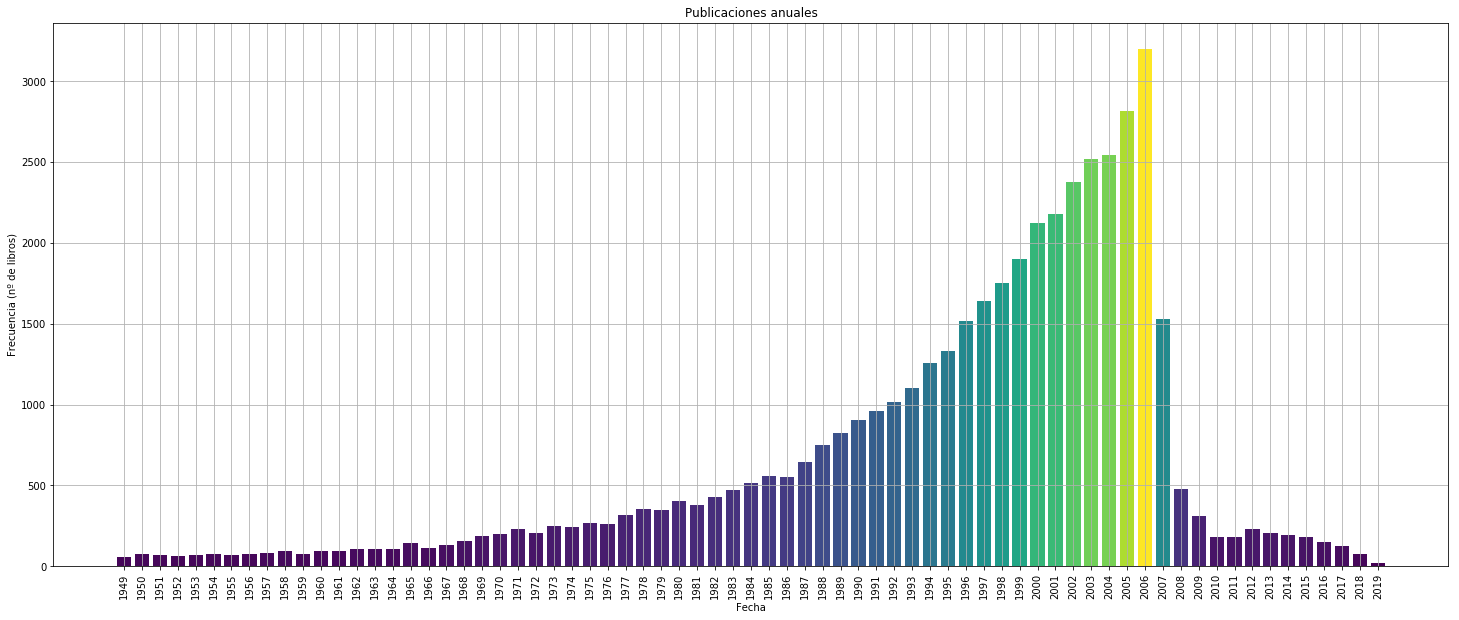

In [43]:
fig = plt.figure(figsize=(25,10))
plt.bar(years.index, years.values, color=bar_colors(years))

# Configuramos la figura
plt.title('Publicaciones anuales')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia (nº de libros)')
plt.xticks(ticks=years.index, rotation='vertical')
plt.grid()
    
plt.show()

### Conclusiones

In [44]:
max_publish_date = int(years[years == years.max()].index[0])
print("Tal y como se aprecia en la figura anterior, el año {} es el año con más publicaciones dentro de los datos obtenidos en el dataset.".format(max_publish_date))

Tal y como se aprecia en la figura anterior, el año 2006 es el año con más publicaciones dentro de los datos obtenidos en el dataset.


## Géneros <a class="anchor" name="generos"/>

A continuación se estudiará la distribución de los genéros dentro del dataset objeto de estudio.

Se obtiene una Serie con el sumatorio de cada una de las columnas; Es decir, el número de libros asociados a cada uno de los géneros. Se ordena en orden descendente:

In [45]:
s_genres = df_genres.sum()
s_genres.sort_values(inplace=True, ascending=False)

s_genres

unknown               3271
fiction               2731
non-fiction           2025
history               1442
classics              1220
novels                1118
literature            1006
historical-fiction     981
adult                  965
historical             941
romance                937
fantasy                896
mystery                811
contemporary           802
adventure              718
school                 669
young-adult            634
reference              620
adult-fiction          615
philosophy             583
childrens              534
biography              531
drama                  521
science                516
humor                  474
crime                  466
unfinished             465
literary-fiction       448
thriller               448
politics               440
                      ... 
post-apocalyptic        53
parenting               52
tragedy                 50
holiday                 49
epic                    49
time-travel             49
a

Con el objetivo de generar el gráfico de barras correspondiente a los géneros más populares históricamente, se reducirá la muestra a aquellos que pertenecen al cuarto cuartil, el 25% de elementos con mayor frecuencia:

In [46]:
min_val = s_genres.quantile(.75)
min_val

263.5

In [47]:
s_genres = s_genres.loc[s_genres >= min_val]
s_genres.values

array([3271, 2731, 2025, 1442, 1220, 1118, 1006,  981,  965,  941,  937,
        896,  811,  802,  718,  669,  634,  620,  615,  583,  534,  531,
        521,  516,  474,  466,  465,  448,  448,  440,  426,  426,  422,
        391,  380,  355,  353,  343,  336,  305,  298,  291,  273,  268,
        266])

A continuación el gráfico con la información de los géneros:

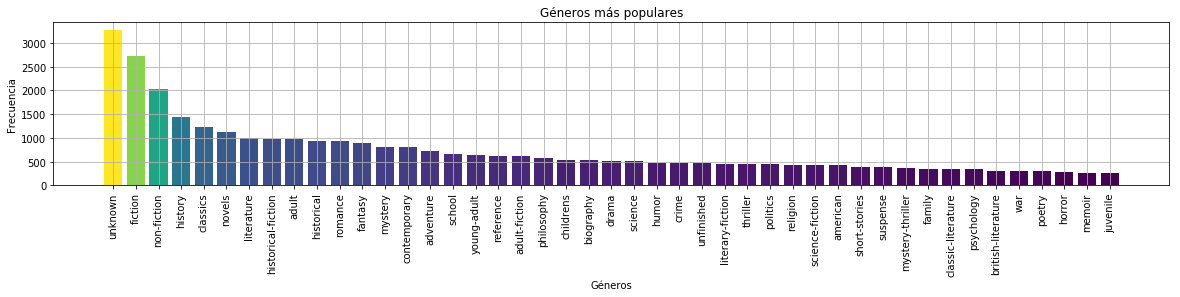

In [48]:
fig = plt.figure(figsize=(20,3))
plt.bar(s_genres.index, s_genres.values, color=bar_colors(s_genres))

# Configuramos la figura
plt.title('Géneros más populares')
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.xticks(rotation='vertical')
plt.grid()

plt.show()

Por último, se muestra esta misma información, en esta ocasión con una nube de palabras:

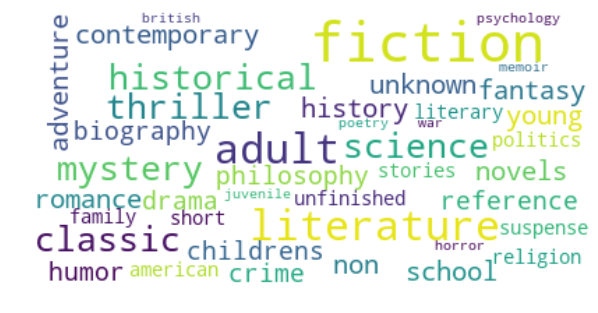

In [49]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color="white",
    max_font_size=40,
    relative_scaling=.5,
    stopwords=set(["dtype", "int64"])
).generate(str(s_genres))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Conclusiones

Como se observa en ambas figuras, los 10 géneros más populares que aparecen en el dataset son:

In [50]:
s_genres[:10]

unknown               3271
fiction               2731
non-fiction           2025
history               1442
classics              1220
novels                1118
literature            1006
historical-fiction     981
adult                  965
historical             941
dtype: int64

## Número de páginas <a class="anchor" name="numero-de-paginas"/>

Se obtiene la serie sobre la que se va a realizar el estudio y se cambia el tipo a int64:

In [51]:
s_pages = df.num_pages.astype(np.int64)
s_pages.head()

0    652
3    555
4     32
6    120
8    312
Name: num_pages, dtype: int64

Información estadística sobre el número de páginas de los libros:

In [52]:
s_pages.describe()

count    45265.000000
mean       280.846327
std        369.419915
min          1.000000
25%        160.000000
50%        251.000000
75%        352.000000
max      63987.000000
Name: num_pages, dtype: float64

## Formatos <a class="anchor" name="formatos"/>

El objetivo de este punto es analizar el dataset en función del formato de los libros. A continuación se obtiene el número de libros por cada formato:

In [53]:
s_format_count = df.format.value_counts()
s_format_count

Paperback                                             27175
Hardcover                                             12348
unknown                                                1731
ebook                                                  1326
Mass Market Paperback                                   948
Unknown Binding                                         895
Kindle Edition                                          151
Audio CD                                                138
Board Book                                              102
Spiral-bound                                             80
Board book                                               38
Audiobook                                                35
Library Binding                                          30
Audio Cassette                                           20
Trade Paperback                                          20
Audible Audio                                            19
Leather Bound                           

A continuación se muestra el gráfico de barras con esta información:

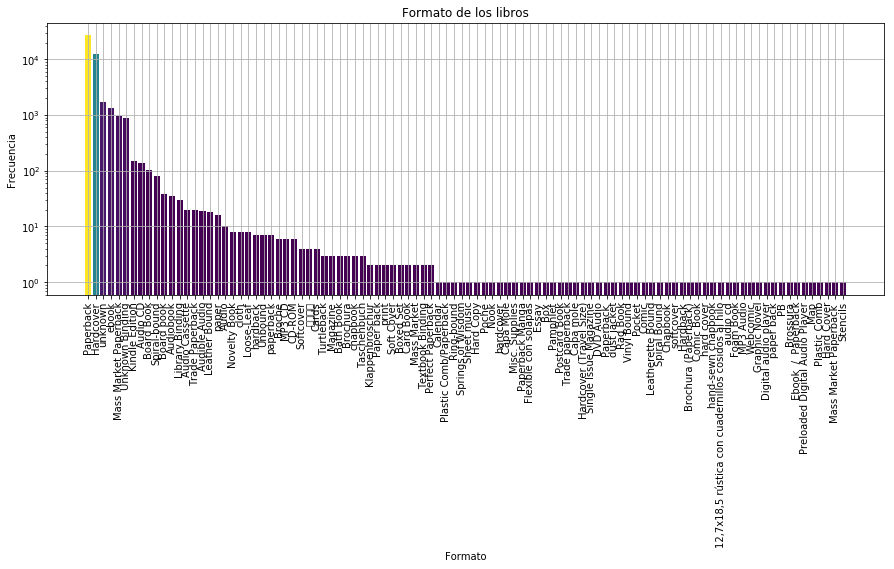

In [54]:
fig = plt.figure(figsize=(15,5))
plt.bar(s_format_count.index, s_format_count.values, color=bar_colors(s_format_count))

# Configuramos la figura
plt.title('Formato de los libros')
plt.xlabel('Formato')
plt.ylabel('Frecuencia')
plt.xticks(ticks=s_format_count.index, rotation='vertical')
plt.semilogy()
plt.grid()
    
plt.show()

### Conclusiones

Tal y como muestra la figura anterior, los 10 formatos más comunes son:

In [55]:
top_ten_rated = s_format_count.head(10).index
for index, value in enumerate(top_ten_rated):
    print("{}. {}".format(index + 1, value))

1. Paperback
2. Hardcover
3. unknown
4. ebook
5. Mass Market Paperback
6. Unknown Binding
7. Kindle Edition
8. Audio CD
9. Board Book
10. Spiral-bound


## Libros mejor valorados <a class="anchor" name="libros-mejor-valorados"/>

En este punto se va a analizar los libros con mejor valoración del dataset.

Para ello, se obtiene la vista del dataset compuesta por las columnas:
* Título
* Valoración media
* Número de valoraciones
* Suma de valoraciones

Se ordenan los resultados en orden descendente y se muestran los primeros:

In [56]:
def ratio_valoration(book):
    return book.average_rating/book.ratings_count

sorted_by_valoration = df[["original_title", "average_rating", "ratings_count", "ratings_sum"]].sort_values(by=["ratings_sum", "average_rating"], ascending=False).head(10)
sorted_by_valoration["ratio_valoration"] = sorted_by_valoration.aggregate(ratio_valoration, axis="columns")

best_ratings = pd.Series(sorted_by_valoration["ratio_valoration"].values, index = sorted_by_valoration["original_title"]).sort_values(ascending=False)
best_ratings

original_title
Harry Potter and the Half-Blood Prince       2.206961e-06
Harry Potter and the Order of the Phoenix    2.117601e-06
Harry Potter and the Deathly Hallows         2.116263e-06
The Kite Runner                              2.004729e-06
Harry Potter and the Prisoner of Azkaban     1.969120e-06
Harry Potter and the Chamber of Secrets      1.949302e-06
Angels & Demons                              1.646526e-06
Nineteen Eighty-Four                         1.641023e-06
To Kill a Mockingbird                        1.103584e-06
Twilight                                     8.170132e-07
dtype: float64

A continuación se muestra un gráfico de barras con la misma información:

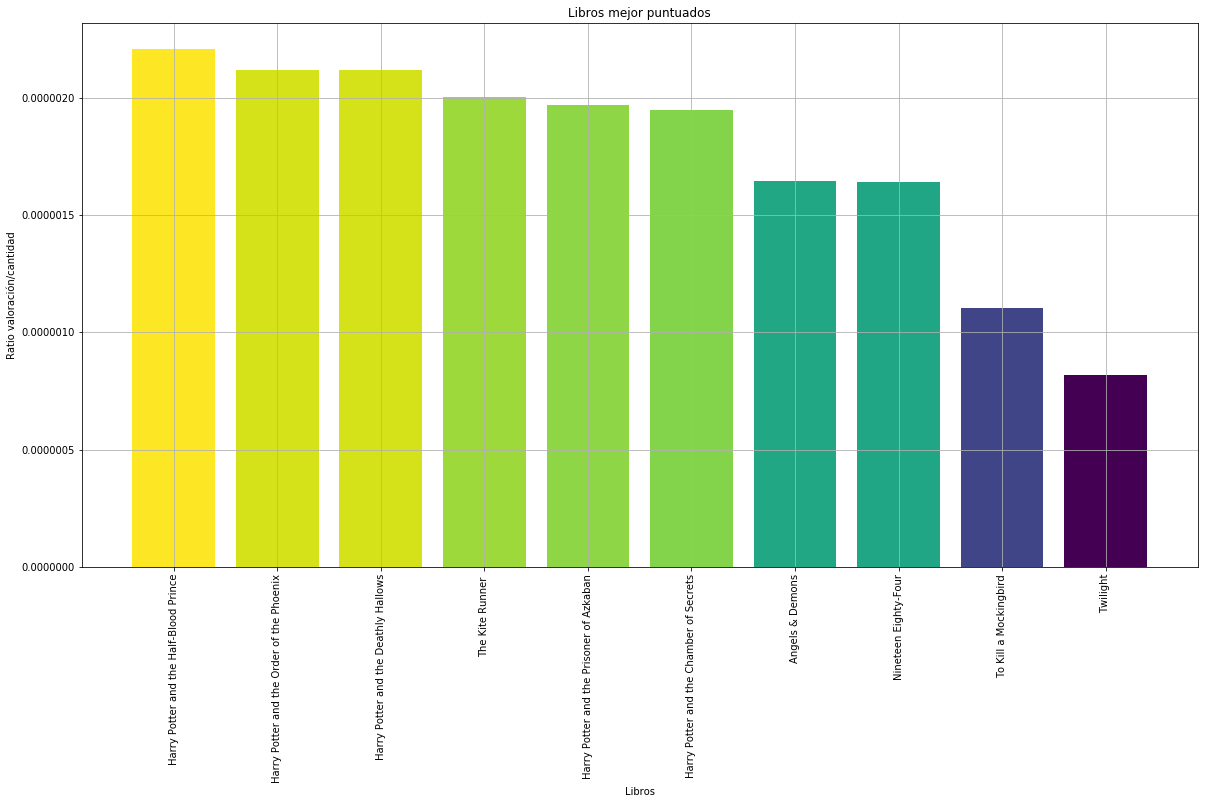

In [57]:
fig = plt.figure(figsize=(20,10))
plt.bar(best_ratings.index, best_ratings.values, color=bar_colors(best_ratings))

# Configuramos la figura
plt.title('Libros mejor puntuados')
plt.xlabel('Libros')
plt.ylabel('Ratio valoración/cantidad')
plt.xticks(rotation='vertical')
plt.grid()

plt.show()

### Conclusiones

La lista con los libros mejor valorados es:

In [58]:
top_ten_rated = best_ratings.head(10).index
for index, value in enumerate(top_ten_rated):
    print("{}. {}".format(index + 1, value))

1. Harry Potter and the Half-Blood Prince
2. Harry Potter and the Order of the Phoenix
3. Harry Potter and the Deathly Hallows
4. The Kite Runner 
5. Harry Potter and the Prisoner of Azkaban
6. Harry Potter and the Chamber of Secrets
7. Angels & Demons
8. Nineteen Eighty-Four
9. To Kill a Mockingbird
10. Twilight


## Preparación para el gráfico de burbujas <a class="anchor" name="bubble-genres"/>

In [59]:
# Cargar el CSV con los super-géneros
df_generos = pd.read_csv("https://raw.githubusercontent.com/pedroortizgm/books-data-science/master/generos.csv")
df_generos

def get_super_genre(g):
    """Dado un genero *g* devuelve el supergénero al que pertenece"""
    bool_df = df_generos.isin([g])
    bool_supergenre = bool_df.any()
    supergenre_index, = np.where(bool_supergenre == True)
    return bool_supergenre[supergenre_index[0]: supergenre_index[0] + 1].index[0]

In [60]:
def get_grouped_for_genre(df, g, max_year):
    """Agrupa la información de un genero por año.
        * Recibe el género a buscar y el número total de años en el dataframe
        * En primer lugar filtra el dataframe recibido por género
        * Rellena los años perdidos
        * Aplica la funcion f al set de datos agrupados"""
    global_dict = {}
    # Filtra el dataframe por género
    df_g = df[g] == 1
    subdataframe = df[df_g][["publication_year", "average_rating", "ratings_count", "num_pages"]]
    # Introduce los años que no ha habido publicaciones para no dejar huecos
    min_year = subdataframe["publication_year"].min().astype(dtype=np.int32)
    year_dict = []
    for year in range(min_year, max_year):
        year_dict.append({"publication_year" : year, "genre": g})
    year_df = pd.DataFrame(year_dict)
    year_df["year"] = year_df["publication_year"].astype(dtype=np.int32)
    subdataframe = pd.merge(subdataframe, year_df, on="publication_year", how = "outer")
    # Agrupa el dataframe por año aplicando la funcion f
    grouped_by_year_genre = subdataframe.groupby("publication_year")
    grouped_by_year_genre = grouped_by_year_genre.apply(lambda x: f(x, g, global_dict))
    grouped_by_year_genre.reset_index(level=0, inplace=True)
    return grouped_by_year_genre

In [61]:
def f(x, g, global_dict):
    """Se crea una funcion que se aplica a todas las agrupaciones por año.
        * Esta función recibe, la agrupación, el género y un diccionario para ir agregando datos de años anteriores
        * Como puede haber años donde no haya publicaciones del libro, se comprueba si no hay páginas ese año.
        * Si hay páginas se calcula el nuevo valor a partir del anterior
        * Si no hay páginas se propaga el valor anterior
        * Si es la primera ocurrencia se inicializa el diccionario"""
    if g in global_dict:
        number_of_books = global_dict[g]["number_of_books"]
        average_rating = global_dict[g]["average_rating"]
        ratings_count = global_dict[g]["ratings_count"]
        num_pages = global_dict[g]["num_pages"]
        # puede que la serie agrupada por año no tenga valores 
        if x.num_pages.sum() > 0:
            number_of_books += x.average_rating.size
            average_rating = global_dict[g]["average_rating"] + (
                (x.average_rating.mean() - global_dict[g]["average_rating"]) / number_of_books)
            ratings_count += x.ratings_count.sum() 
            num_pages += x.num_pages.sum()
        
        global_dict[g] = {
            "average_rating" : average_rating, 
            "ratings_count" : ratings_count, 
            "num_pages": num_pages,
            "number_of_books": number_of_books,
            "genre" : g,
            "supergenre": get_super_genre(g)
        }
    else:
        global_dict[g] = {
            "average_rating" : x.average_rating.mean(), 
            "ratings_count" : x.ratings_count.sum(), 
            "num_pages": x.num_pages.sum(),
            "number_of_books": x.average_rating.size,
            "genre" : g,
            "supergenre": get_super_genre(g)
        }
    return pd.Series(global_dict[g])

genres_columns = ["academic", "action", "aliens", "american", "animals", "anthropology", 
                  "adventure", "adult-fiction", "angels", "american-history", "nature", "art", 
                  "chick-lit", "dark", "demons", "americana", "movies", "business", "class", 
                  "death", "epic", "criticism", "picture-books", "cookbooks", "classic-literature", 
                  "erotica", "epic-fantasy", "christianity", "music", "cooking", "classics", "horror", 
                  "fairy-tales", "christian", "plays", "cultural", "christmas", "menage", "fantasy", 
                  "christian-fiction", "film", "economics", "comedy", "abuse", "ghosts", "gay", 
                  "education", "contemporary", "bdsm", "high-fantasy", "marriage", "faith", 
                  "cozy-mystery", "magic", "lgbt", "family", "crime", "magical-realism",
                  "parenting", "feminism", "detective", "mythology", "queer", "food", "drama", 
                  "paranormal", "relationships", "health", "post-apocalyptic", 
                  "society", "funny", "science-fiction", "spirituality", "language", 
                  "historical", "science-fiction-fantasy", "inspirational", "leadership", 
                  "historical-fiction", "shapeshifters", "humor", "steampunk", 
                  "mental-health", "literary-fiction", "speculative-fiction", "mental-illness", 
                  "love", "superheroes", "personal-development", "love-story", "supernatural", 
                  "philosophy", "medieval", "time-travel", "politics", "modern", "urban-fantasy", 
                  "psychology", "modern-classics", "vampires", "reference", 
                  "werewolves", "religion", "mystery", "witches", "research", "mystery-thriller", 
                  "dystopia", "science", "social", "realistic-fiction", "self-help", 
                  "romance", "social-issues", "suspense", "sociology", "thriller", "sports", 
                  "true-crime", "survival", "tragedy", "teaching", "war", "technology", "gothic", 
                  "theology", "travel", "writing", "medical"]
df_books_by_genre_and_year = pd.DataFrame()
max_year = df.publication_year.max().astype(dtype=np.int32)
for g in genres_columns:
    grouped_by_year_genre = get_grouped_for_genre(df, g, max_year)
    df_books_by_genre_and_year = df_books_by_genre_and_year.append(grouped_by_year_genre, ignore_index=True)

df_books_by_genre_and_year.to_csv('books_by_genre_and_year.csv', index=False)

df_books_by_genre_and_year.shape

(7345, 7)

<div style="width: 100%;">
    <div style="width: 33.33%; float: left;">
        &nbsp;
    </div>
    <div style="width: 33.33%; float: left; text-align: center">
        <span>David Julián Yela</span><br/>
        <span>Daniel Mateo Serrano</span><br/>        
        <span>Pedro Ortiz García-Miguel</span>
    </div>
    <div style="width: 33.33%; float: left; text-align: right">
        <a href="./graficos.ipynb">Continuar a Gráficos</a>
    </div>
</div>